Try to use Colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/My Drive
# %rm -f -r mlmech
# ! git clone https://github.com/jfra1397/mlmech.git
# %cd mlmech

In [ ]:
# !git checkout main
# !git pull

Training starts here

In [1]:
import custom
import create_model
from importlib import reload

In [2]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


train, validation = CustomDataGenerator.generate_data(batch_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed)# ,single_img=single_img)
img_size = train.img_size
print(img_size)
mask_size = train.mask_size
print(mask_size)

Number of samples:  5443
Classes: [0 1]
Number of samples:  605
Classes: [0 1]
(256, 256, 3)
(256, 256)


-1.0
0.94509804
0.0
1.0
[0 1]


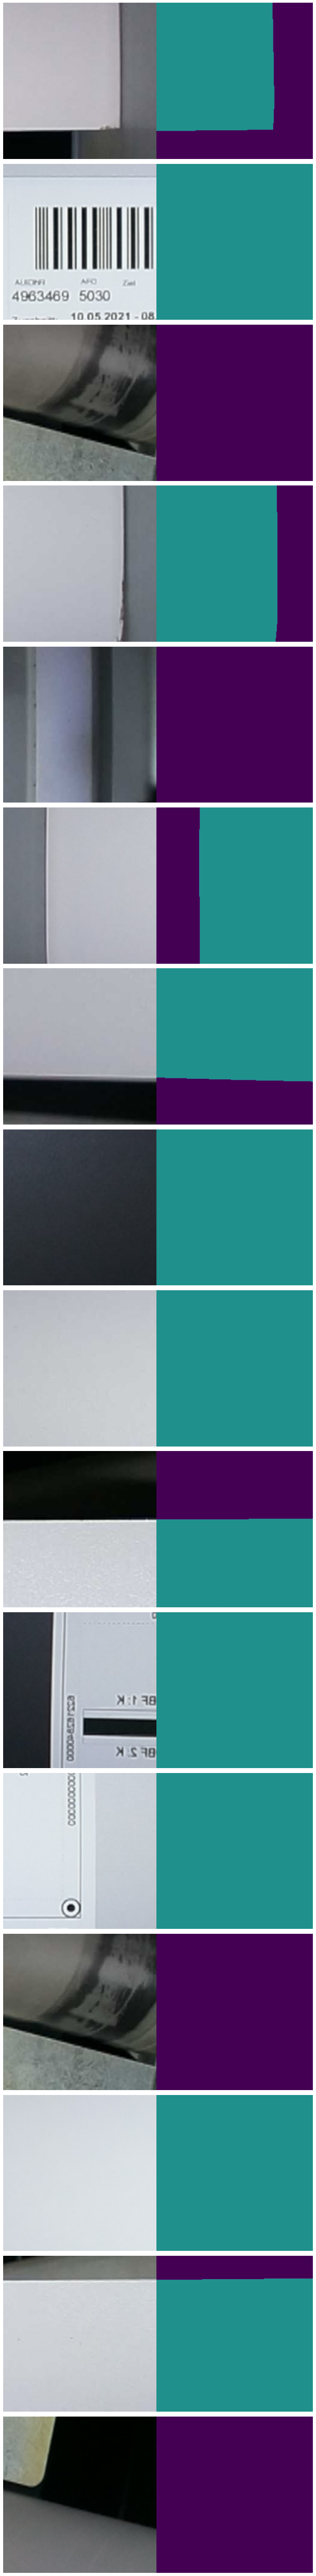

In [3]:
train.plot_batch(3)

img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

In [10]:
reload(custom)
from custom import *

reload(create_model)
from create_model import generate_model

import tensorflow.keras.losses as losses

model = generate_model(img_size)

model.compile(optimizer='adam',
                loss=loss,
                metrics=[dice_metric, "Accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_image[0][0]                
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [11]:
reload(custom)
from custom import *

history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1, shuffle=True, callbacks=callback)

Epoch 1/50
20/20 [==============================] - 98s 5s/step - loss: 0.5631 - dice_metric: 0.6244 - Accuracy: 0.7567 - val_loss: 0.5096 - val_dice_metric: 0.6886 - val_Accuracy: 0.7571
Epoch 2/50
20/20 [==============================] - 87s 4s/step - loss: 0.3913 - dice_metric: 0.7742 - Accuracy: 0.8205 - val_loss: 0.3207 - val_dice_metric: 0.8468 - val_Accuracy: 0.8990
Epoch 3/50
20/20 [==============================] - 105s 5s/step - loss: 0.2994 - dice_metric: 0.8440 - Accuracy: 0.9059 - val_loss: 0.3042 - val_dice_metric: 0.8322 - val_Accuracy: 0.9268
Epoch 4/50
20/20 [==============================] - 83s 4s/step - loss: 0.2540 - dice_metric: 0.8600 - Accuracy: 0.9524 - val_loss: 0.2283 - val_dice_metric: 0.8825 - val_Accuracy: 0.9615
Epoch 5/50
20/20 [==============================] - 83s 4s/step - loss: 0.2013 - dice_metric: 0.8878 - Accuracy: 0.9707 - val_loss: 0.2016 - val_dice_metric: 0.8919 - val_Accuracy: 0.9649
Epoch 6/50
20/20 [==============================] - 83s 4s/

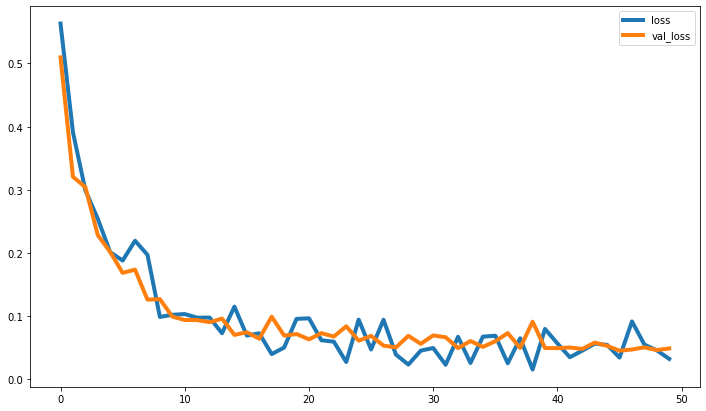

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

1/1 [==============================] - 2s 2s/step


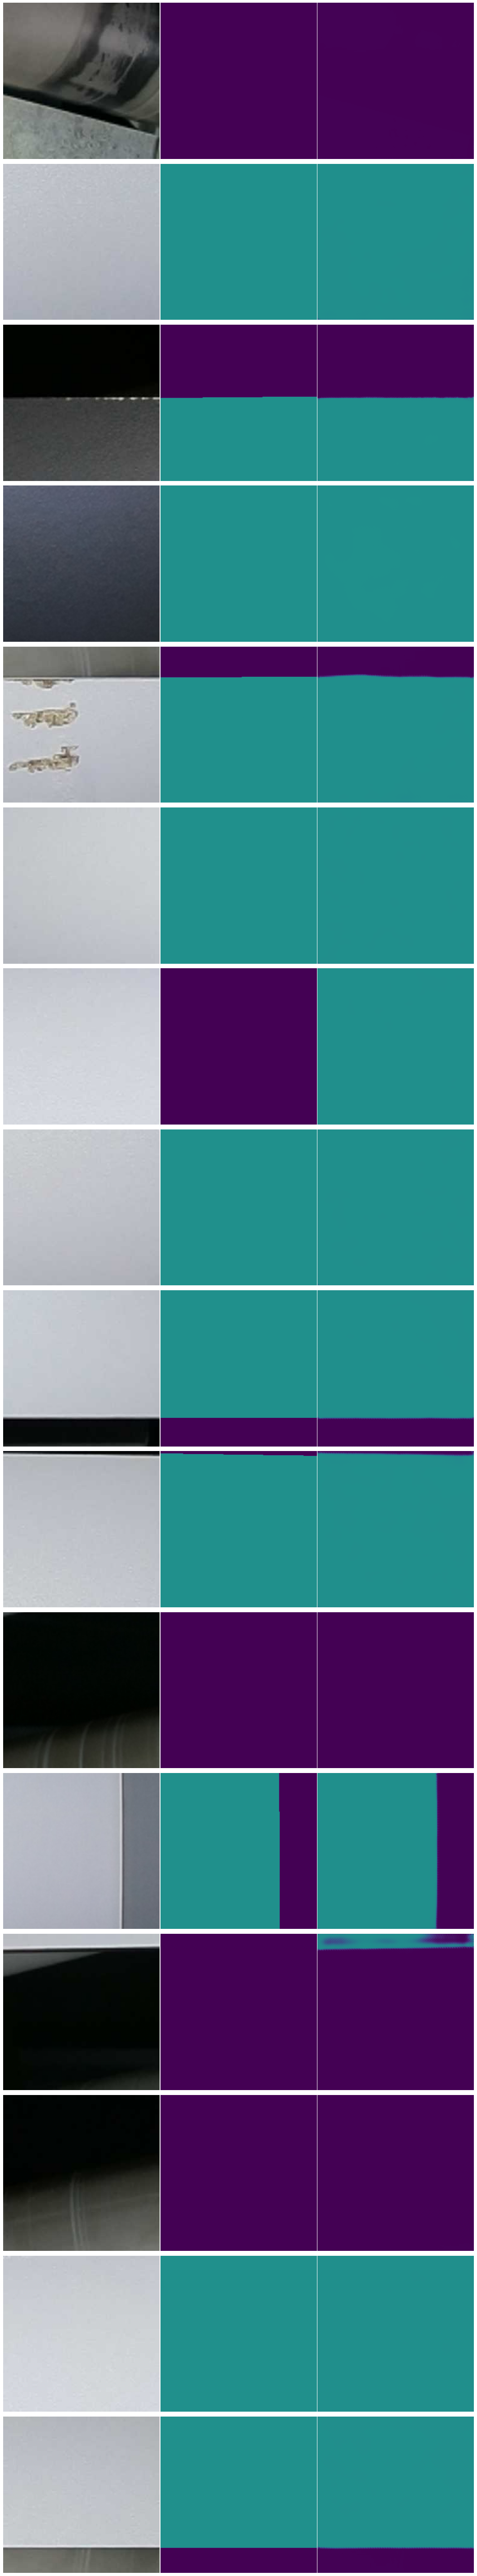

In [13]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)

In [14]:
reload(custom)
from custom import *

import pandas as pd
import os

os.mkdir(dir_name)

from shutil import copyfile
copyfile("custom.py", dir_name + "/custom.py")
copyfile("create_model.py", dir_name + "/create_model.py")


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = dir_name + '/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

#save model
model.save(dir_name + "/model.tf", include_optimizer = True)
model.save_weights(dir_name + "/weights.tf")

INFO:tensorflow:Assets written to: results/julian/unet_mobilenet_sC/model.tf/assets


/home/jfra/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
